In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score  
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import itertools
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
np.set_printoptions(threshold=np.nan)

#data is veel groter, want alle alcohol
pdata = pd.read_csv("../Data/preprocessed_conditiondata_perperson.csv")
# pdata = pdata.drop(["Unnamed: 0"], axis=1)
pdata['Conditie'] = pdata['Conditie'].map({'norm': 0,  'bril': 1})
# pdata['Alcohol'] = pdata['Alcohol'].map({'Sober': 0,  'Light': 1, 'Tipsy': 2, 'Drunk': 3})
# pdata = pdata[pdata.Alcohol == 0]
pdata

,Conditie,SubjectID,Height,Weight,Age,BMI,std_SegmentData,mad_SegmentData,AverageStepLength
0,0,6,177,70.0,20,22.343516,0.051247,0.040761,0.664377
1,1,6,177,70.0,20,22.343516,0.040890,0.032495,0.543385
2,0,9,195,86.0,23,22.616700,0.022745,0.019538,0.700817
3,1,9,195,86.0,23,22.616700,0.042159,0.033549,0.497828
4,0,10,165,65.0,28,23.875115,0.106283,0.095379,0.516998
5,1,10,165,65.0,28,23.875115,0.061240,0.053097,0.522667
6,0,11,179,68.0,25,21.222808,0.021762,0.018467,0.586470
7,1,11,179,68.0,25,21.222808,0.103909,0.088957,0.445404
8,0,13,168,70.0,18,24.801587,0.025560,0.020575,0.639974
9,1,13,168,70.0,18,24.801587,0.049625,0.040664,0.591725


In [2]:
#Splits data into training and validation according to specified ratio
def validation_split(data, ratio):
    sidlist = data['SubjectID'].unique()
    gdata = [data[data['SubjectID']==sid] for sid in sidlist]
    np.random.shuffle(gdata)
    N = len(gdata)
    training = gdata[:int(ratio*N)]
    validation = gdata[(int(ratio*N)):]
    return training,validation

# Converts the arrays in a list to one flattend dataframe
def flatten(data, variable_list):
    return pd.DataFrame(np.vstack(data), columns=variable_list)

def get_split_data(originaldata, variable_list, ratio):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Conditie', 'SubjectID'], axis=1)
    y_train = training['Conditie']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Conditie', 'SubjectID'], axis=1)
    y_test = validation['Conditie']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    return X_train, X_test, y_train, y_test

collist =  ['SubjectID', 'Conditie', 'AverageStepLength', 'mad_SegmentData']
X_train, X_test, y_train, y_test = get_split_data(pdata, collist , 0.7)


X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=int)

X_test = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=int)


Bayes classifier accuracy 0.8214285714285714
Confusion matrix, without normalization
[[20  8]
 [ 2 26]]


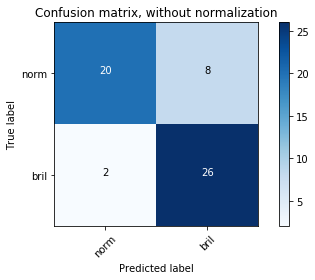

In [3]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
# print(classification_report(y_test, y_pred))
print('Bayes classifier accuracy', accuracy_score(y_test, y_pred))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['norm', 'bril'],
                      title='Confusion matrix, without normalization')

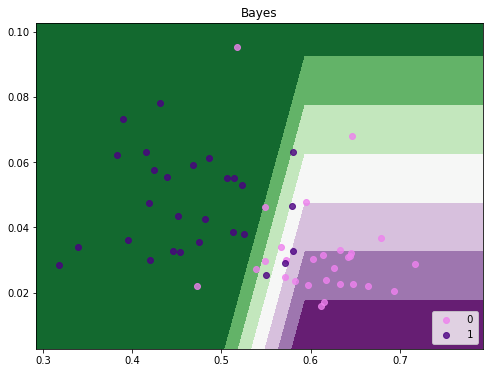

In [4]:


#Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {0: 'violet', 1: 'indigo'}
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                label=' {}'.format(label))

plt.legend(loc='lower right')
plt.title('Bayes')
plt.show()

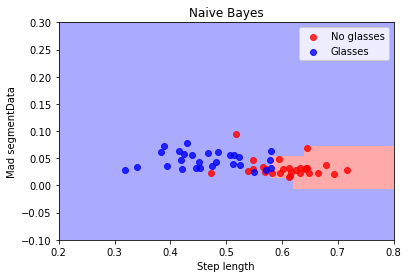

In [5]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
colors = {0: 'red', 1: 'blue'}
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)

score = gnb.score(X_test, y_test)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, alpha=0.5, cmap=cmap_bold)

for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                label=' {}'.format(label))

colors = ['red', 'blue']
labels = ['No glasses', 'Glasses']
plt.legend(labels)
plt.xlim(0.2,0.8)
plt.ylim(-0.1,0.3)
plt.title('Naive Bayes')
plt.xlabel('Step length')
plt.ylabel('Mad segmentData')
plt.savefig('Naive Bayes')
plt.show()

In [6]:
def make_decisions(originaldata, variable_list):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Conditie', 'SubjectID'], axis=1)
    y_train = training['Conditie']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Conditie', 'SubjectID'], axis=1)
    y_test = validation['Conditie']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    
    gnb = GaussianNB()
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    return accuracy_score(y_test, y_pred)



make_decisions(pdata, collist)

0.8392857142857143

In [7]:
# print('Accuracy Scores for different variables (mean of 100 loops)')
# print('BMI, Age, mad_SegmentData:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'Age', 'mad_SegmentData']) for i in range(100)]))
# print('BMI, Age, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'Age', 'AverageStepLength']) for i in range(100)]))
# print('BMI, Age, mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'Age', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
# print('BMI, mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
print('std_SegmentData, mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'Weight', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
print('mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
# print('mad_SegmentData, AverageStepLength, 6,0,01:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))


std_SegmentData, mad_SegmentData, AverageStepLength: 0.8425
mad_SegmentData, AverageStepLength: 0.8342857142857142


Alcohol classification

In [14]:
adata = pd.read_csv("../Data/preprocessed_alcoholdata_full.csv")
adata = adata.drop(["Unnamed: 0"], axis=1)
adata['Conditie'] = adata['Conditie'].map({'norm': 0,  'bril': 1})
adata['Alcohol'] = adata['Alcohol'].map({'Sober': 0,  'Light': 1, 'Tipsy': 1,  'Drunk': 1})
# display(adata)

normdata = pd.read_csv("../Data/preprocessed_alcoholdata_full.csv")
normdata['Conditie'] = normdata['Conditie'].map({'norm': 0,  'bril': 1})
normdata = normdata.drop(normdata[normdata["Conditie"] > 0].index)
normdata['Alcohol'] = normdata['Alcohol'].map({'Sober': 0,  'Light': 1, 'Tipsy': 2,  'Drunk': 3})

In [15]:
variable_list = ['SubjectID', 'Alcohol', 'mad_SegmentData', 'AverageStepLength']

data = adata[variable_list]
training,validation = validation_split(data, 0.7)
training = flatten(training, variable_list)
validation = flatten(validation, variable_list)

X_train = training.drop(['Alcohol', 'SubjectID'], axis=1)
y_train = training['Alcohol']
X_train = X_train.astype(float)
y_train = y_train.astype(int)

X_test = validation.drop(['Alcohol', 'SubjectID'], axis=1)
y_test = validation['Alcohol']
X_test = X_test.astype(float)
y_test = y_test.astype(int)

X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=int)

X_test = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=int)


gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


Accuracy of our model is equal 61.7 %.


In [16]:
variable_list = ['SubjectID', 'Alcohol', 'mad_SegmentData', 'AverageStepLength']

def make_alcohol_decisions(originaldata, variable_list):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    Xtrain = training.drop(['Alcohol', 'SubjectID'], axis=1)
    Ytrain = training['Alcohol']
    Xtrain = Xtrain.astype(float)
    Ytrain = Ytrain.astype(int)
    
    Xval = validation.drop(['Alcohol', 'SubjectID'], axis=1)
    Yval = validation['Alcohol']
    Xval = Xval.astype(float)
    Yval = Yval.astype(int)
    
    classifier = DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.01)  
    classifier.fit(Xtrain, Ytrain)  
    y_pred = classifier.predict(Xval) 
    return accuracy_score(Yval, y_pred)


make_alcohol_decisions(adata, variable_list)

0.5531914893617021

In [17]:
# print('Accuracy Scores for different variables (mean of 100 loops)')
# print('BMI, Age, mad_SegmentData:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'BMI', 'Age', 'mad_SegmentData']) for i in range(100)]))
# print('BMI, Age, AverageStepLength:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'BMI', 'Age', 'AverageStepLength']) for i in range(100)]))
# print('BMI, Age, mad_SegmentData, AverageStepLength:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'BMI', 'Age', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
# print('BMI, mad_SegmentData, AverageStepLength:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'BMI', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
# print('Age, mad_SegmentData, AverageStepLength:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'Age', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
print('mad_SegmentData, AverageStepLength:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
# print('mad_SegmentData, AverageStepLength:', np.mean([make_alcohol_decisions(normdata, ['SubjectID', 'Alcohol', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))



mad_SegmentData, AverageStepLength: 0.5371010638297872


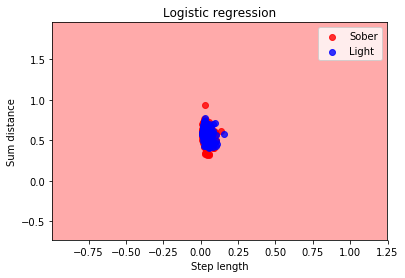

In [18]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
colors = {0: 'red', 1: 'blue', 2: 'violet', 3: 'indigo'}
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)

score = gnb.score(X_test, y_test)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, alpha=0.5, cmap=cmap_bold)

for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                label=' {}'.format(label))

colors = ['red', 'blue', 'violet', 'indigo']

labels = ['Sober', 'Light', 'Tipsy', 'Drunk']
plt.legend(labels)
# plt.xlim(0,1)
# plt.ylim(-0.1,0.3)
plt.title('Logistic regression')
plt.xlabel('Step length')
plt.ylabel('Sum distance')
plt.savefig('Logistic regression alcohol')
plt.show()